In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("F:\\My folder\\Intellipaat Advance Data Science\\Supervised learning_module\\diabetes.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

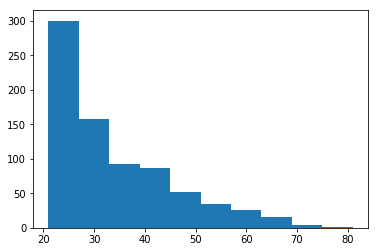

In [7]:
plt.hist(df.Age, bins = 10)
plt.show()

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [9]:
vif_data=pd.DataFrame()
vif_data['feature']=df.columns
vif_data["VIF"]=[variance_inflation_factor(df.values,i) for i in range(len(df.columns))]
print(vif_data)

                    feature        VIF
0               Pregnancies   3.364416
1                   Glucose  18.030209
2             BloodPressure  15.313159
3             SkinThickness   4.008709
4                   Insulin   2.063940
5                       BMI  18.515112
6  DiabetesPedigreeFunction   3.213450
7                       Age  13.500531
8                   Outcome   1.948398


In [10]:
# remove VIF variable above the score of 6 - column name Glucose, Bloodpressure, BMI
df.new = df.drop(columns={'Glucose','BloodPressure','BMI','Age'})
df.new

C:\Users\vijay.varadharajan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


,Pregnancies,SkinThickness,Insulin,DiabetesPedigreeFunction,Outcome
0,6,35,0,0.627,1
1,1,29,0,0.351,0
2,8,0,0,0.672,1
3,1,23,94,0.167,0
4,0,35,168,2.288,1
...,...,...,...,...,...
763,10,48,180,0.171,0
764,2,27,0,0.340,0
765,5,23,112,0.245,0
766,1,0,0,0.349,1


In [11]:
vif_data1=pd.DataFrame()
vif_data1['feature']=df.new.columns
vif_data1["VIF"]=[variance_inflation_factor(df.new.values,i) for i in range(len(df.new.columns))]
print(vif_data1)

                    feature       VIF
0               Pregnancies  1.847868
1             SkinThickness  2.748220
2                   Insulin  1.878005
3  DiabetesPedigreeFunction  2.479356
4                   Outcome  1.692530


In [12]:
df_x = df.drop(columns ='Outcome')
df_x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [13]:
df_y = df.Outcome
df_y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

# Divide the dataset into two parts for training and testing in 70% and 30% proportion

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [15]:
x_train,x_test,y_train,y_test=train_test_split(df_x,df_y,train_size=0.7,random_state=2)

In [16]:
y_test.shape

(231,)

In [17]:
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
501,3,84,72,32,0,37.2,0.267,28
371,0,118,64,23,89,0.0,1.731,21
634,10,92,62,0,0,25.9,0.167,31
221,2,158,90,0,0,31.6,0.805,66
12,10,139,80,0,0,27.1,1.441,57


In [18]:
logmodel=LogisticRegression()

In [19]:
logmodel.fit(x_train,y_train)

C:\Users\vijay.varadharajan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [20]:
prediction=logmodel.predict(x_test)

In [21]:
prediction

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [22]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [56]:
log_reg_score = accuracy_score(y_test,prediction)
log_reg_score

0.7619047619047619

In [24]:
confusion_matrix(y_test,prediction)

array([[139,  16],
       [ 39,  37]], dtype=int64)

In [25]:
#accuracy tn+tp/(tp+tn+fp+fn)

In [26]:
(139+37)/(139+16+39+37)

0.7619047619047619

# Assignment : Random Forest Model

In [27]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 42)

In [28]:
rf1=rf.fit(x_train,y_train) 

In [29]:
y_pred=rf1.predict(x_test)

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.7792207792207793

In [31]:
from sklearn.model_selection import RandomizedSearchCV

In [32]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [33]:
rf = RandomForestClassifier(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf2=rf_random.fit(x_train, y_train);

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [34]:
rf2.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': True}

In [36]:
y_pred=rf2.predict(x_test)

In [58]:
from sklearn.metrics import accuracy_score
rf_score = accuracy_score(y_pred,y_test)
rf_score

0.7662337662337663

# Decision Tree Assignment 

In [40]:
from sklearn import tree

In [42]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

[Text(170.521,216.424,'X[1] <= 127.5\ngini = 0.459\nsamples = 537\nvalue = [345, 192]'),
 Text(69.0487,200.393,'X[7] <= 28.5\ngini = 0.313\nsamples = 330\nvalue = [266, 64]'),
 Text(20.5454,184.361,'X[5] <= 45.4\ngini = 0.16\nsamples = 182\nvalue = [166, 16]'),
 Text(16.8098,168.33,'X[5] <= 30.9\ngini = 0.135\nsamples = 179\nvalue = [166, 13]'),
 Text(13.0743,152.299,'gini = 0.0\nsamples = 100\nvalue = [100, 0]'),
 Text(20.5454,152.299,'X[3] <= 5.5\ngini = 0.275\nsamples = 79\nvalue = [66, 13]'),
 Text(7.47104,136.267,'X[1] <= 110.0\ngini = 0.473\nsamples = 13\nvalue = [8, 5]'),
 Text(3.73552,120.236,'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(11.2066,120.236,'X[6] <= 0.799\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(7.47104,104.204,'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(14.9421,104.204,'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(33.6197,136.267,'X[6] <= 0.501\ngini = 0.213\nsamples = 66\nvalue = [58, 8]'),
 Text(26.1486,120.236,'X[5] <= 31.1\ngini = 0.04

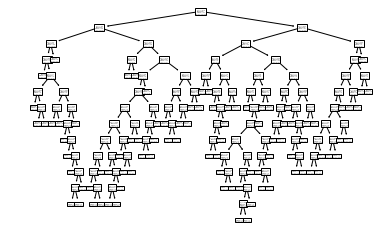

In [46]:
tree.plot_tree(clf)

In [51]:
y_pred_dt=rf1.predict(x_test)

In [53]:
from sklearn.metrics import accuracy_score
dt_score = accuracy_score(y_pred_dt,y_test)

In [66]:
dt_score*100

77.92207792207793

# Naive Bayes Model

In [72]:
from sklearn.naive_bayes import GaussianNB

In [80]:
gnb = GaussianNB()
y_pred_gnb = gnb.fit(x_train, y_train).predict(x_test)

In [81]:
 print("Number of mislabeled points out of a total %d points : %d"
...       % (x_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 231 points : 53


In [83]:
from sklearn.metrics import accuracy_score
gnb_score = accuracy_score(y_pred_gnb,y_test)
gnb_score

0.7705627705627706

# Accuracy Score of the models


In [84]:
print("The accuracy score of the logistic model is: ", round(log_reg_score*100,2))
print("The accuracy score of Decision tree model is: ",round(dt_score*100,2))
print("The accuracy score of Random forest model is:", round(rf_score*100,2))
print("The accuracy score of Gaussian Naive Bayes Model is: ", round(gnb_score*100,2))

The accuracy score of the logistic model is:  76.19
The accuracy score of Decision tree model is:  77.92
The accuracy score of Random forest model is: 76.62
The accuracy score of Gaussian Naive Bayes Model is:  77.06
